# Time Series Analysis of One or More Datasets

This notebook allows you to analyze and compare two time series datasets.
Currated from Tensorflow and Kaggle by Tom.Nguyen@ieee.org



In [ ]:
import os
import datetime
import zipfile

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #statistical data visualization
import tensorflow as tf


from statsmodels.tsa.seasonal import seasonal_decompose # for decomposing time series
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

print("Current directory is "+os.getcwd())


Current directory is /content


### Helper Functions

In [ ]:
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Function', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



### Get Data



In [ ]:
# Get from a url OR...
zip_path = tf.keras.utils.get_file(
    origin='https://[url to file here]',
    fname='Alibaba_region_01_withFuncID.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)


In [ ]:
# Get from local directory (zip files were previously uploaded to the same folder)
with zipfile.ZipFile('./Alibaba_region_01_withFuncID.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
with zipfile.ZipFile('./TCN_AzurePayload_TRAIN__v20230225.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
df_Ali = pd.read_csv('./Alibaba_region_01_withFuncID.csv')
print(df_Ali.head())
print(df_Ali.shape)
print(df_Ali.describe())
df_Azu = pd.read_csv('./TCN_AzurePayload_TRAIN__v20230225.csv')
df_Azu['Func_ID'] = df_Azu['Func_ID'].replace(0,37461) # replace Func_ID of 0 with 37461
print(df_Azu.head())
print(df_Azu.shape)
print(df_Azu.describe())

# Sub-sampling - Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]

# Rename columns
# df.columns = ['Date','Number of Passengers']

# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


   idx  __time__                      functionName       latency  runtime  \
0    0       600  a9edb01dd99821162b67fbe590c7a961    914.149029   php7.2   
1    1       600  81a92affd3f236647999d1fb5f715d84    719.684061  python3   
2    2       600  3a22c9ea9a3039d180e0a514a5a3b619   5251.875852   custom   
3    3       600  1952a01898073d1e561b9b4f2e42cbd7  13040.219307  python3   
4    4       600  514665440903686ba22a79f42691041e    539.851082  nodejs6   

   memoryMB  func_ID  
0       512       10  
1       512       20  
2       512       30  
3       256       40  
4       128       50  
(286058, 7)
                 idx       __time__        latency       memoryMB  \
count  286058.000000  286058.000000  286058.000000  286058.000000   
mean   214147.806931   44628.117214    3935.908672     837.992183   
std    128072.983316   24319.237681    5939.052531    1766.858635   
min         0.000000     600.000000       8.424088     128.000000   
25%     99658.250000   24483.250000     66

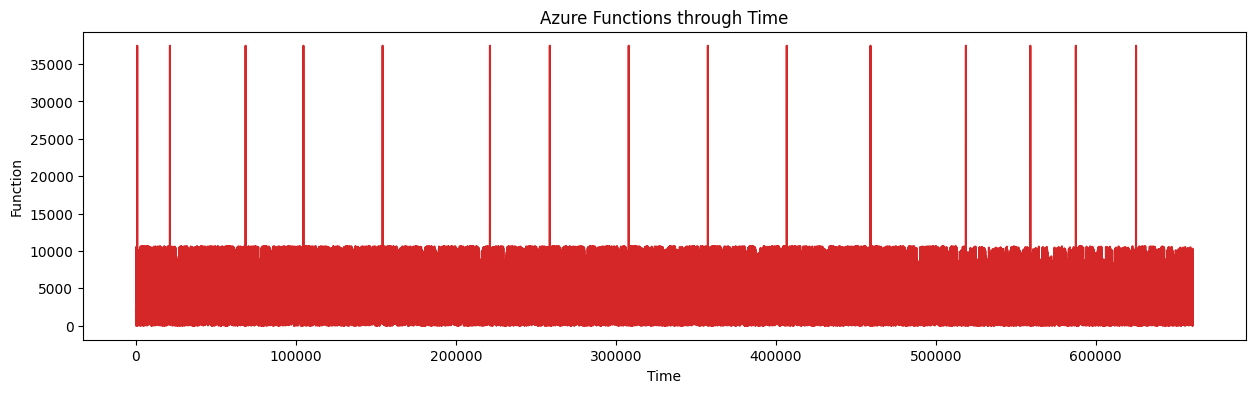

In [ ]:
plot_df(df_Azu, x=df_Azu['Func_index'], y=df_Azu['Func_ID'], title='Azure Functions through Time')

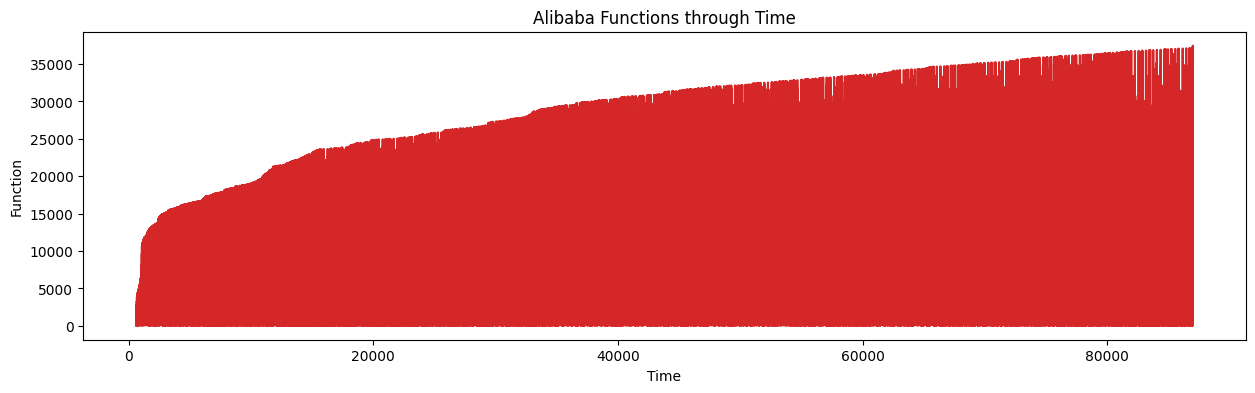

In [ ]:
plot_df(df_Ali, x=df_Ali['__time__'], y=df_Ali['func_ID'], title='Alibaba Functions through Time')

### Decomposing Time Series
Additive time series:

Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:

Value = Base Level x Trend x Seasonality x Error

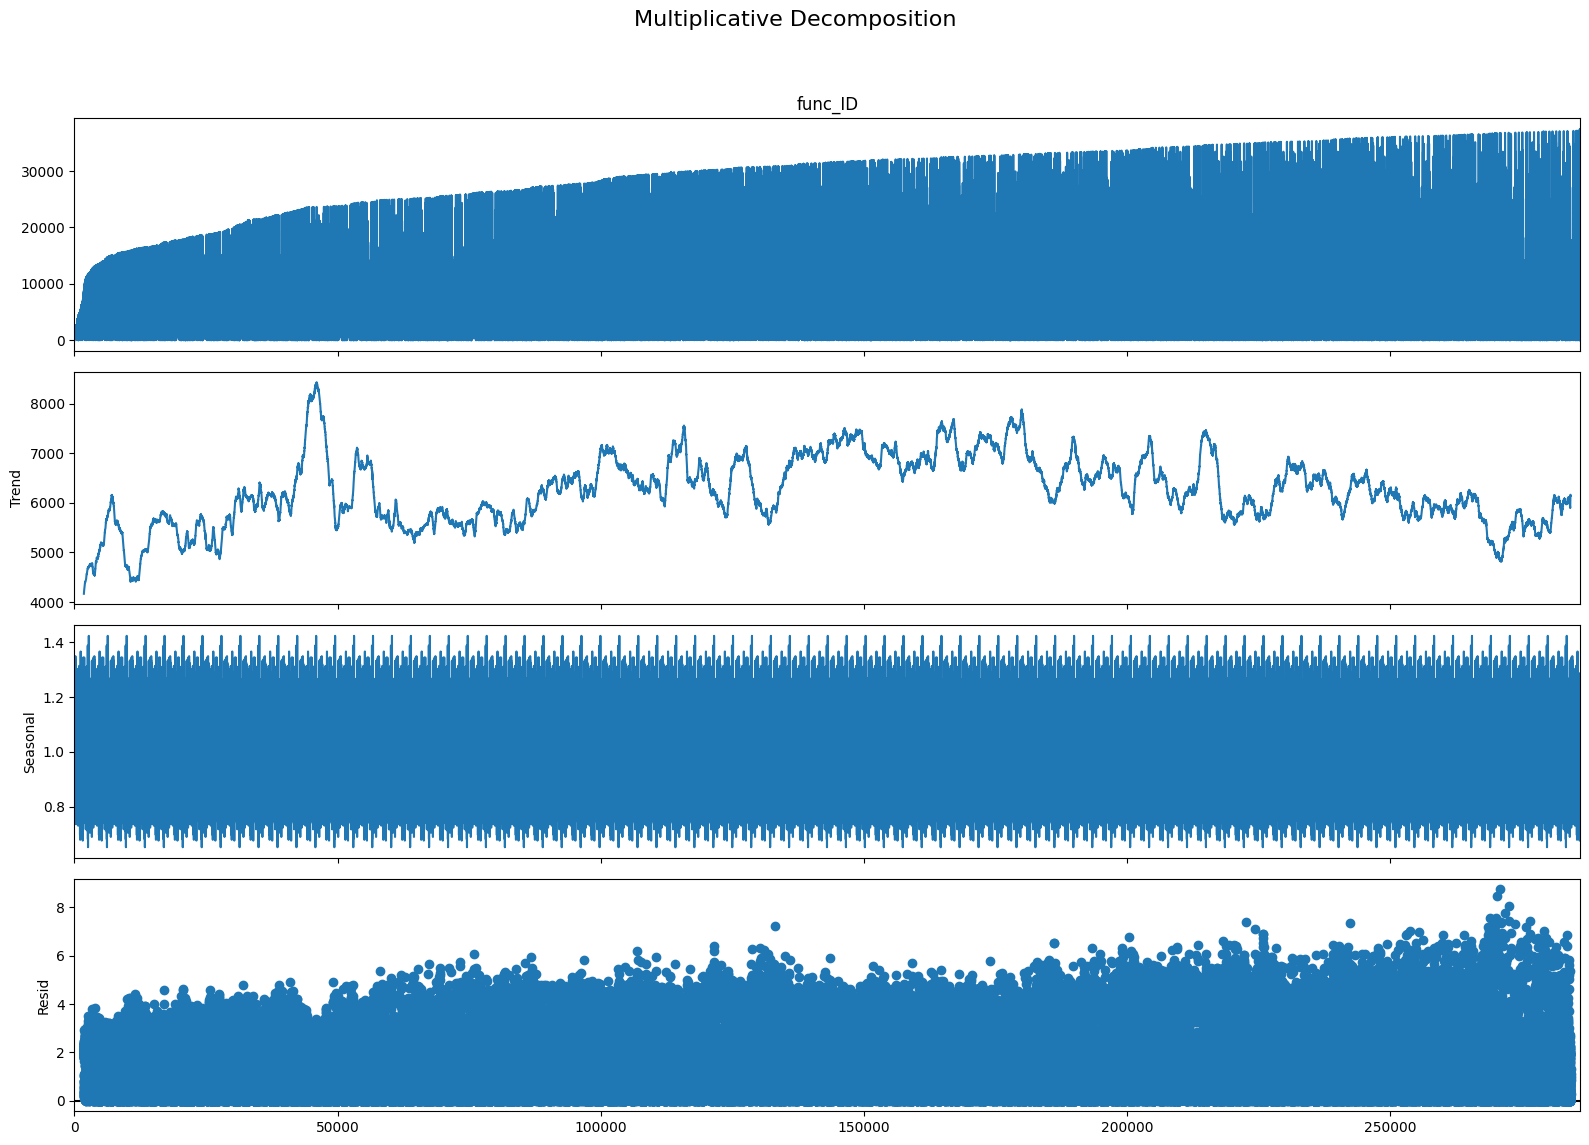

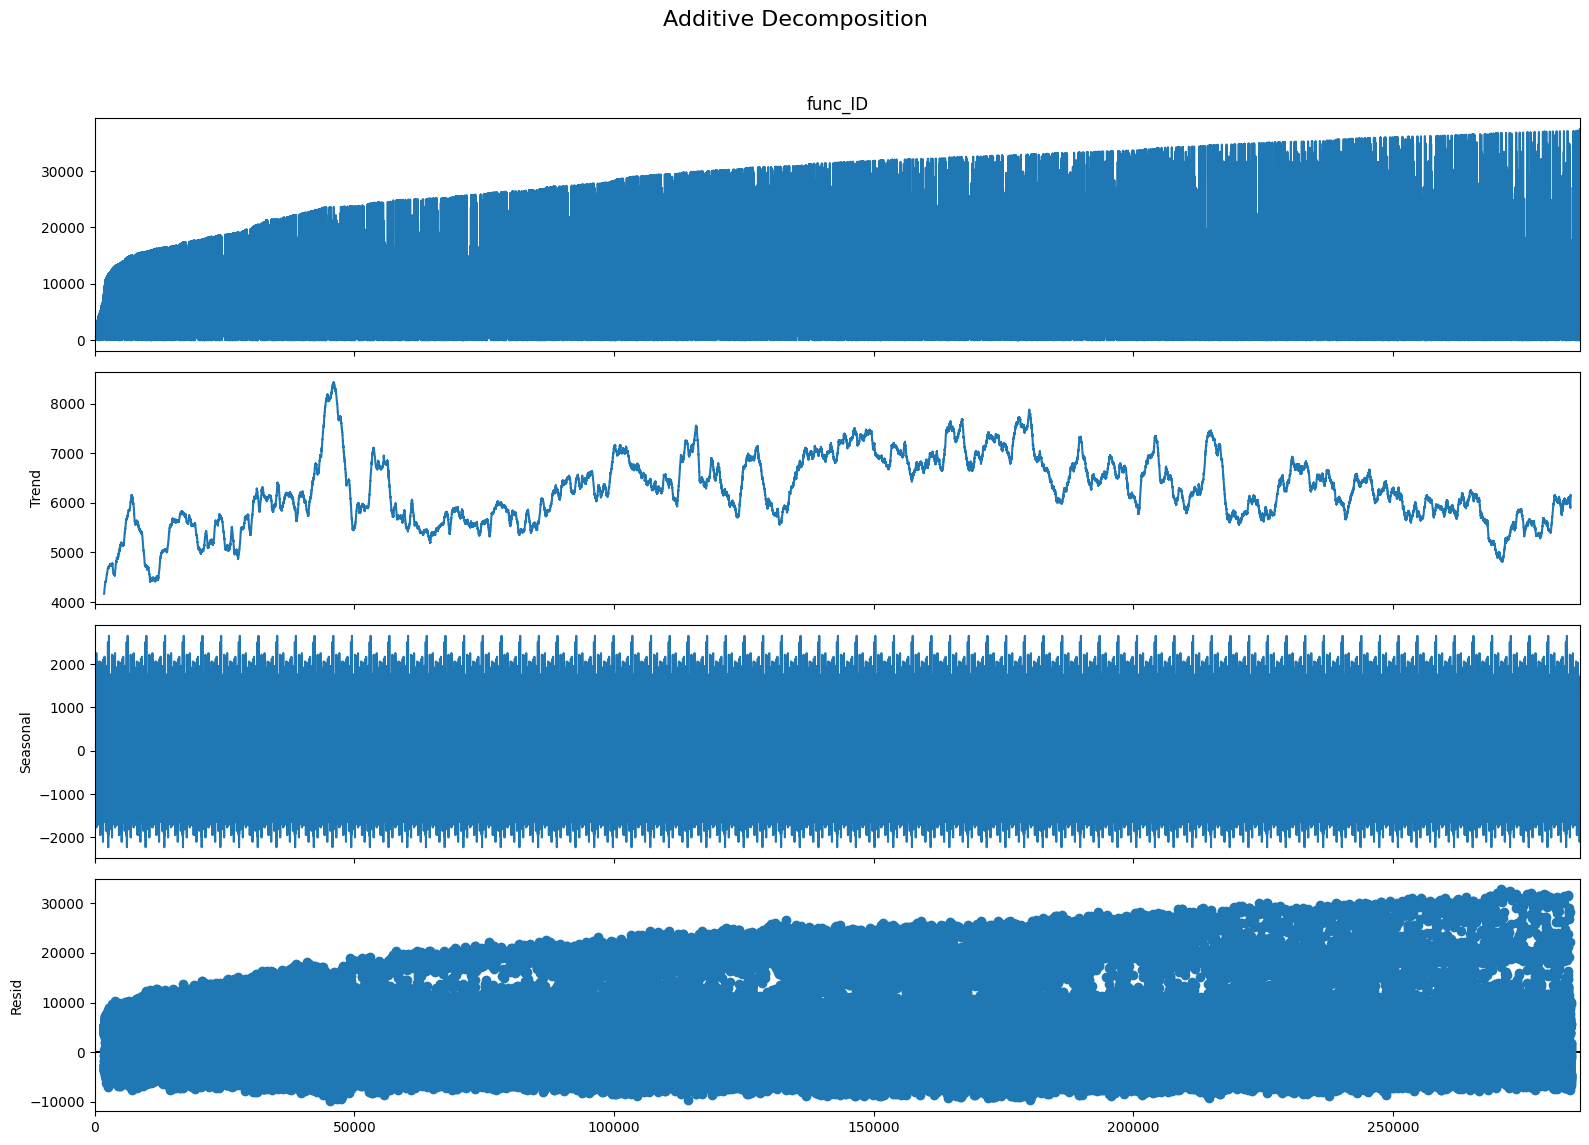

In [ ]:
# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df_Ali['func_ID'], model='multiplicative', period=3600)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_Ali['func_ID'], model='additive', period=3600)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

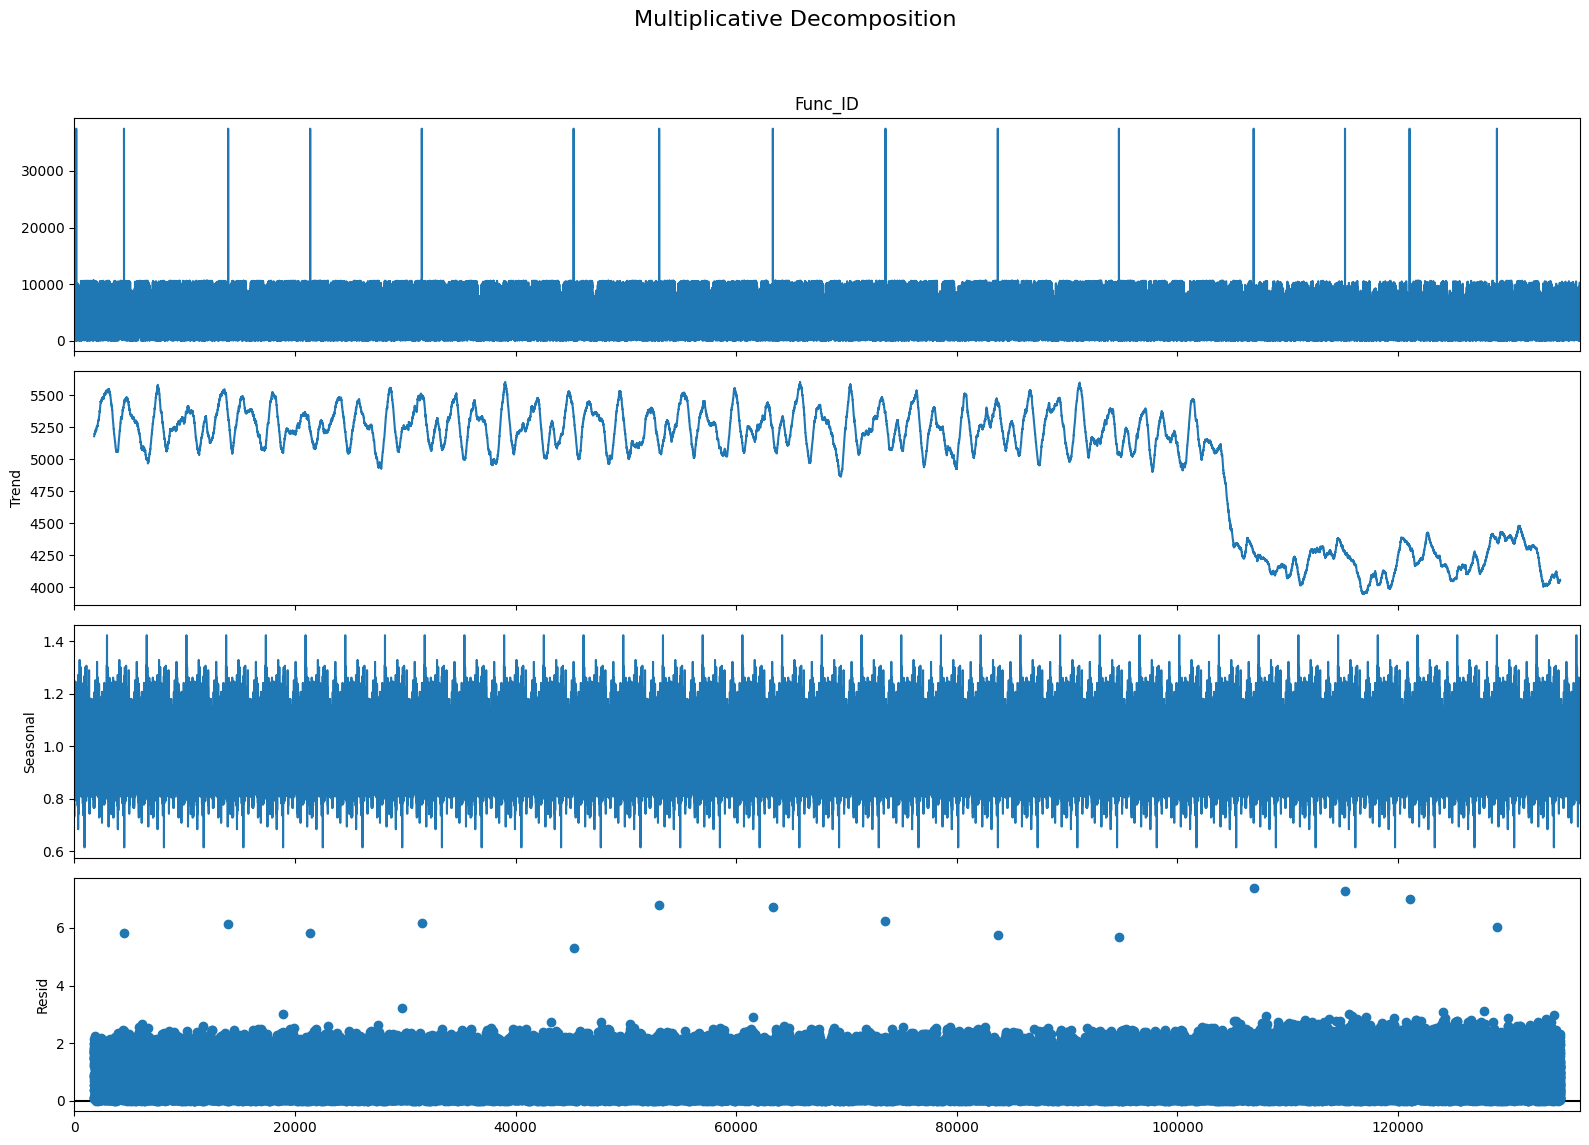

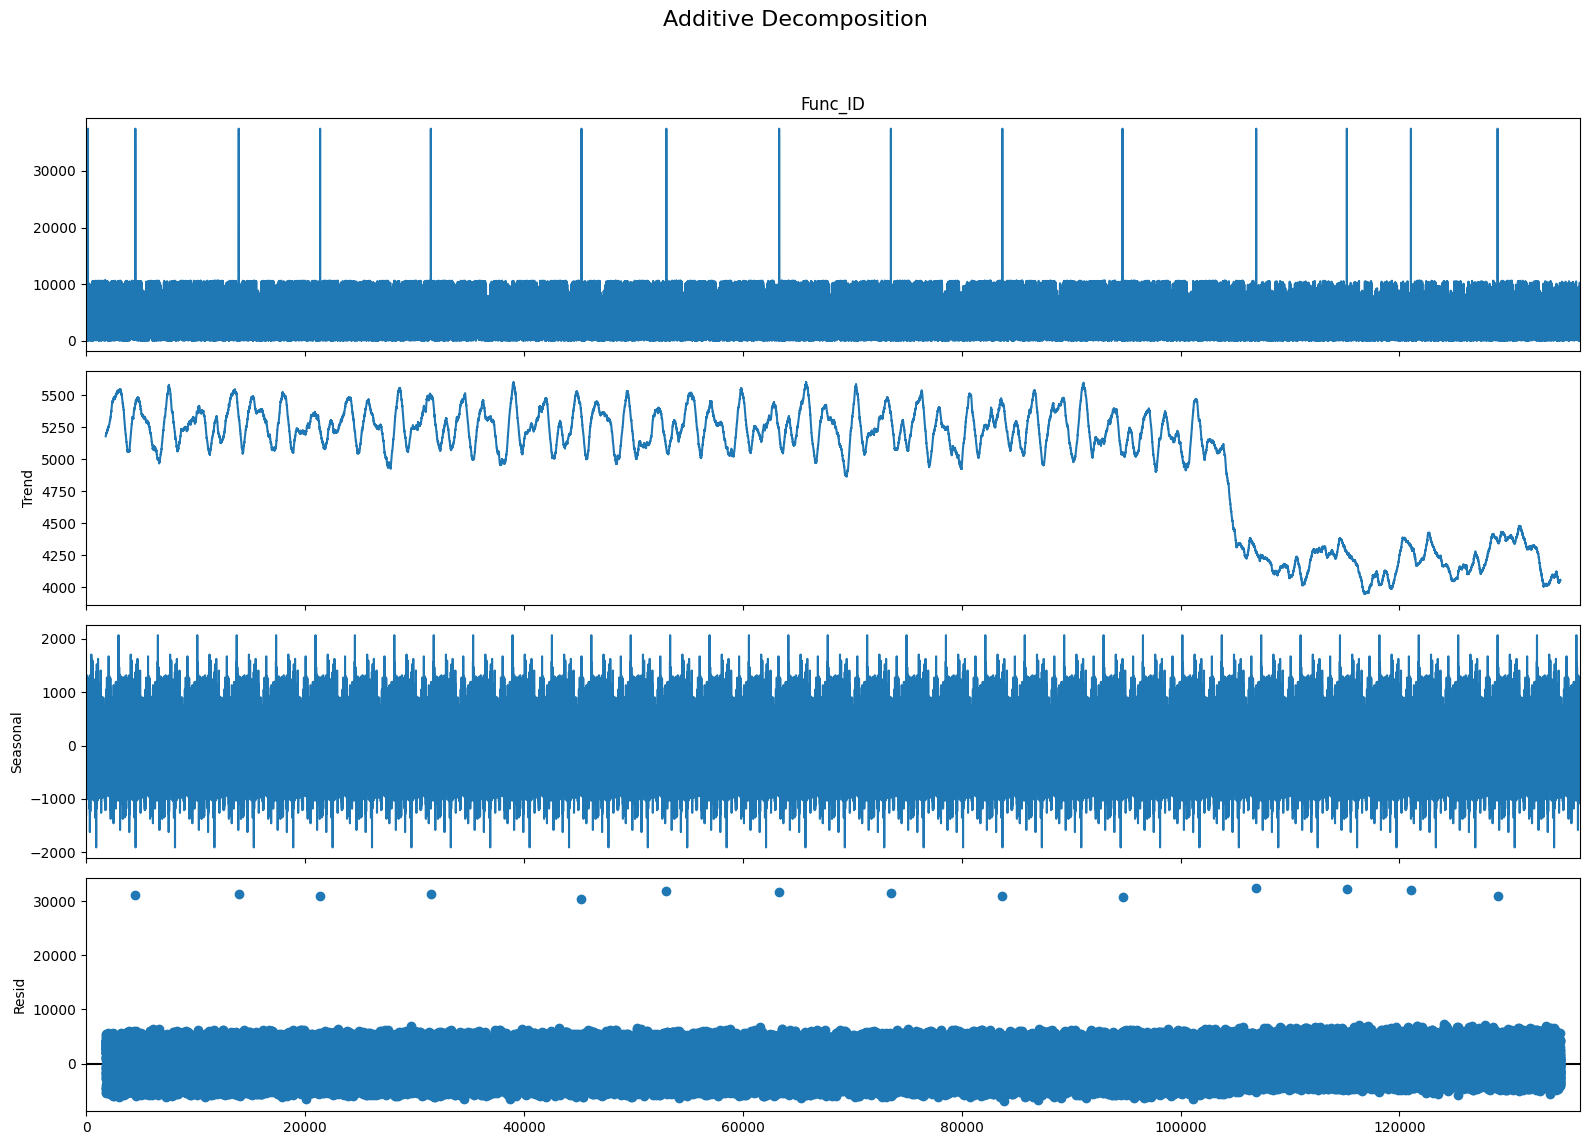

In [ ]:
# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df_Azu['Func_ID'], model='multiplicative', period=3600)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_Azu['Func_ID'], model='additive', period=3600)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Stationary Tests

In [ ]:
# perform augmented Dickey-Fuller test - may take a while - may crash if there are many rows
# https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
ADF_Azu=adfuller(df_Azu['Func_ID'])
print("ADF test result for Azure")
print(ADF_Azu)
if ADF_Azu[1]<0.05: print("Azure appears to be stationary")
ADF_Ali=adfuller(df_Ali['func_ID'])
print("ADF test result for Alibaba")
print(ADF_Ali)
if ADF_Ali[1]<0.05: print("Alibaba appears to be stationary")

ADF test result for Azure
(-19.185447260620176, 0.0, 73, 136423, {'1%': -3.4303979349013582, '5%': -2.861561186537739, '10%': -2.566781276841811}, 2546291.6854377002)
Azure appears to be stationary
ADF test result for Alibaba
(-32.8722394855997, 0.0, 88, 285969, {'1%': -3.430372867369189, '5%': -2.8615501070913503, '10%': -2.566775379638432}, 5785366.510747117)
Alibaba appears to be stationary


In [ ]:
# perform Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
# https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/
KPSS_Azu=kpss(df_Azu['Func_ID'])
print("KPSS test result for Azure")
print(KPSS_Azu)
if KPSS_Azu[1]>0.05: print("Azure appears to be stationary")
KPSS_Ali=kpss(df_Ali['func_ID'])
print("KPSS test result for Alibaba")
print(KPSS_Ali)
if KPSS_Ali[1]>0.05: print("Alibaba appears to be stationary")

KPSS test result for Azure
(7.433712476425942, 0.01, 178, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test result for Alibaba
(4.386098939392346, 0.01, 242, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


<ipython-input-10-1440618096e2>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_Azu=kpss(df_Azu['Func_ID'])
<ipython-input-10-1440618096e2>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_Ali=kpss(df_Ali['func_ID'])
